In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('santander_churn.csv')

df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [25]:
# Exibir as 5 primeiras linhas do dataset
print("Primeiras 5 linhas do dataset:")
print(df.head())

# Informações gerais sobre o dataset
print("\nInformações gerais do dataset:")
print(df.info())

# Resumo estatístico das variáveis numéricas
print("\nResumo estatístico das variáveis numéricas:")
print(df.describe())

# Verificar se há valores ausentes
print("\nValores ausentes por coluna:")
print(df.isnull().sum())

# Distribuição das classes no target (por exemplo, churn)
print("\nDistribuição das classes no target:")
print(df['Exited'].value_counts())

Primeiras 5 linhas do dataset:
   id  CustomerId         Surname  CreditScore Geography Gender   Age  Tenure  \
0   0    15674932  Okwudilichukwu          668    France   Male  33.0       3   
1   1    15749177   Okwudiliolisa          627    France   Male  33.0       1   
2   2    15694510           Hsueh          678    France   Male  40.0      10   
3   3    15741417             Kao          581    France   Male  34.0       2   
4   4    15766172       Chiemenam          716     Spain   Male  33.0       5   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
0       0.00              2        1.0             0.0        181449.97   
1       0.00              2        1.0             1.0         49503.50   
2       0.00              2        1.0             0.0        184866.69   
3  148882.54              1        1.0             1.0         84560.88   
4       0.00              2        1.0             1.0         15068.83   

   Exited  
0       0  
1      

C:\Users\Anthony\AppData\Local\Temp\ipykernel_23468\1056341498.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Não', 'Sim'])


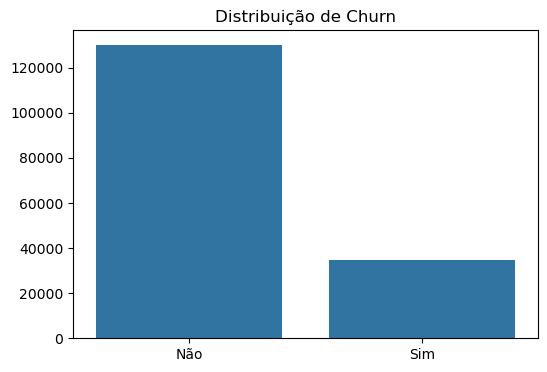

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Exited', data=df)
plt.title('Distribuição de Churn')
ax.set_xlabel('')
ax.set_ylabel('') 
ax.set_xticklabels(['Não', 'Sim'])

plt.show()


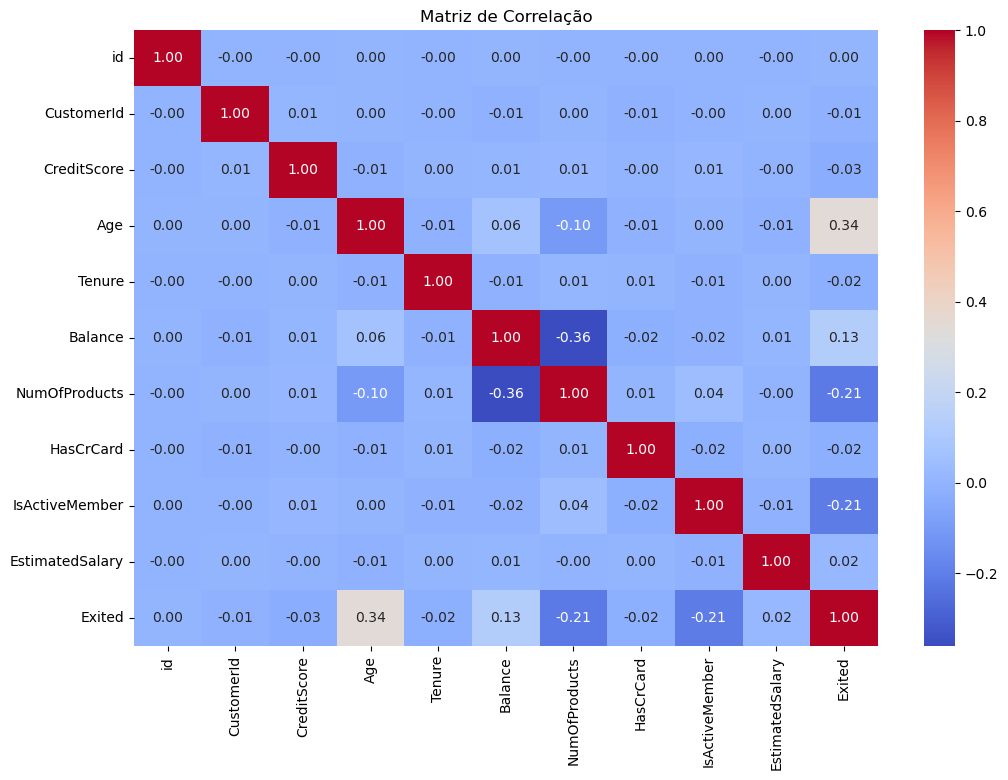

In [27]:
# Visualização das correlações entre as variáveis
plt.figure(figsize=(12, 8))
correlation_matrix = df.select_dtypes(include=[np.number]).corr()  # Seleciona apenas colunas numéricas
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()

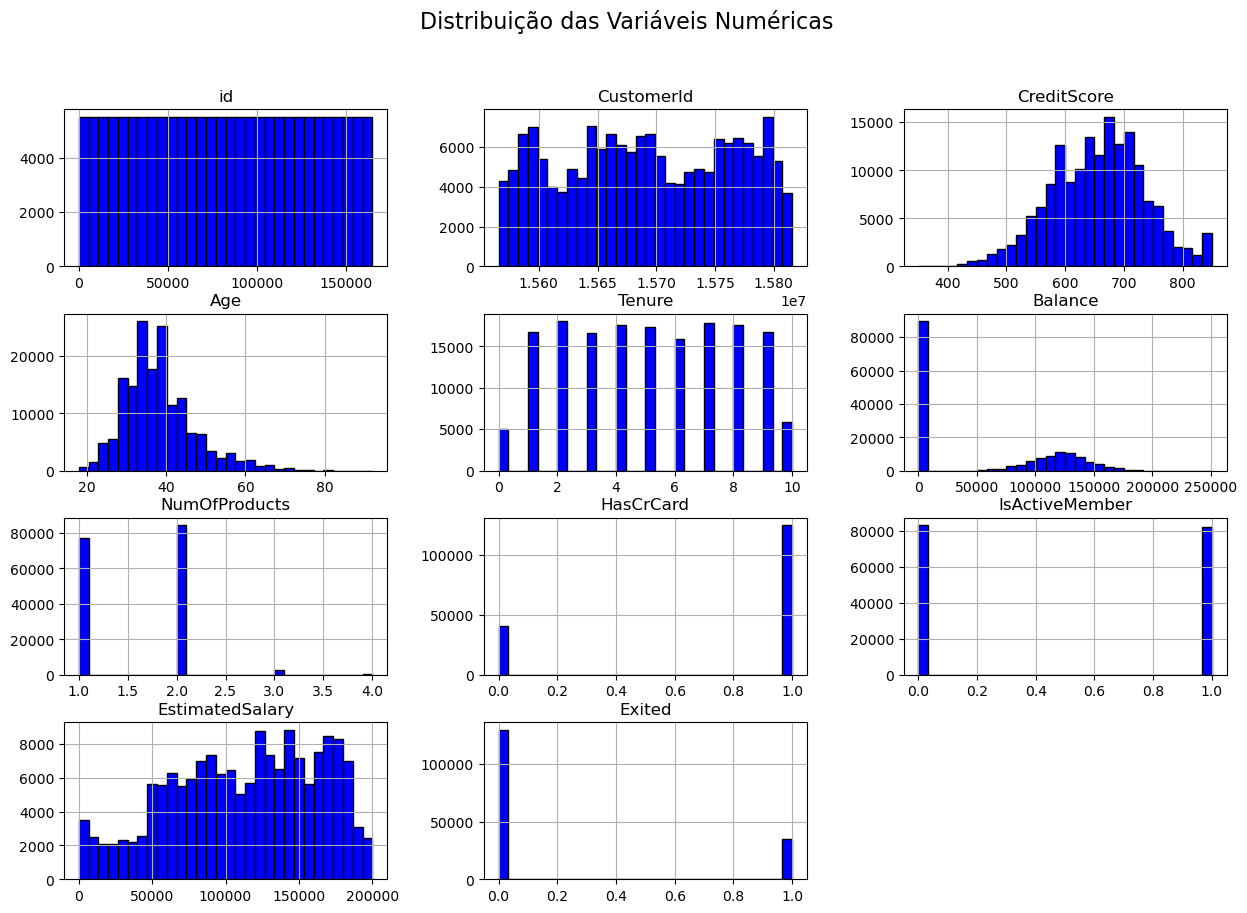

In [28]:
# Histogramas das variáveis numéricas
df.hist(bins=30, figsize=(15, 10), color='blue', edgecolor='black')
plt.suptitle('Distribuição das Variáveis Numéricas', fontsize=16)
plt.show()


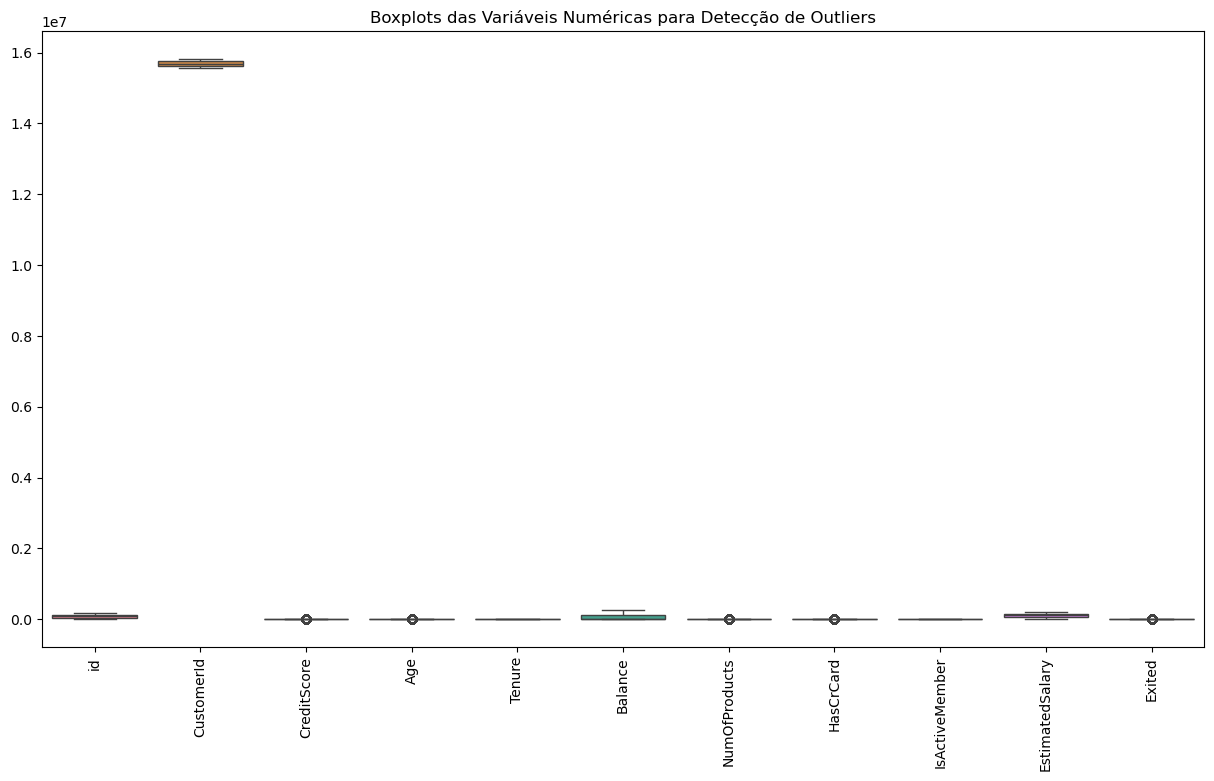

In [6]:
# Boxplots para detectar outliers nas variáveis numéricas
plt.figure(figsize=(15, 8))
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']))
plt.title('Boxplots das Variáveis Numéricas para Detecção de Outliers')
plt.xticks(rotation=90)
plt.show()


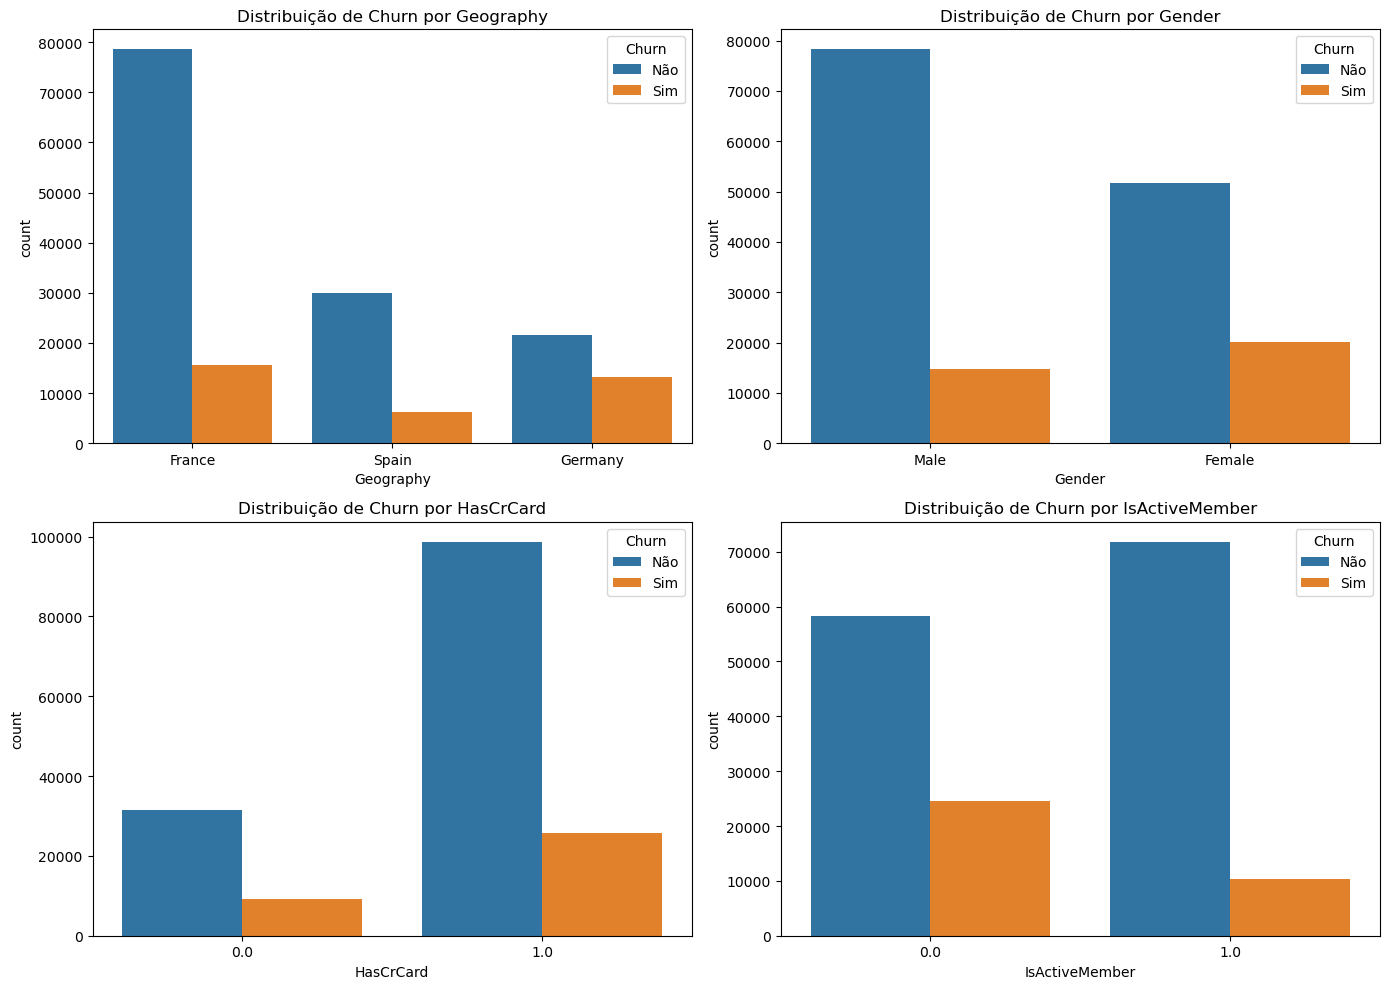

In [30]:
# Análise da relação entre churn e outras variáveis categóricas
categorical_columns = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

plt.figure(figsize=(14, 10))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=col, hue='Exited', data=df)
    plt.title(f'Distribuição de Churn por {col}')
    plt.legend(title='Churn', loc='upper right', labels=['Não', 'Sim'])
plt.tight_layout()
plt.show()

In [9]:
df = df.drop(['CustomerId', 'Surname'], axis=1)
df.head()

,id,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [11]:
df = pd.get_dummies(df, columns = ['Geography', 'Gender'], drop_first=True)
df.head()

,id,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,0,668,33.0,3,0.00,2,1.0,0.0,181449.97,0,False,False,True
1,1,627,33.0,1,0.00,2,1.0,1.0,49503.50,0,False,False,True
2,2,678,40.0,10,0.00,2,1.0,0.0,184866.69,0,False,False,True
3,3,581,34.0,2,148882.54,1,1.0,1.0,84560.88,0,False,False,True
4,4,716,33.0,5,0.00,2,1.0,1.0,15068.83,0,False,True,True


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['CreditScore', 'Age', 'Balance', 'EstimatedSalary']] = scaler.fit_transform(df[['CreditScore', 'Age', 'Balance', 'EstimatedSalary']])
df.head()

,id,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,0,0.144135,-0.578074,3,-0.883163,2,1.0,0.0,1.369486,0,False,False,True
1,1,-0.367706,-0.578074,1,-0.883163,2,1.0,1.0,-1.254085,0,False,False,True
2,2,0.268974,0.211354,10,-0.883163,2,1.0,0.0,1.437422,0,False,False,True
3,3,-0.941966,-0.465299,2,1.486918,1,1.0,1.0,-0.557018,0,False,False,True
4,4,0.743362,-0.578074,5,-0.883163,2,1.0,1.0,-1.938770,0,False,True,True


In [13]:
from sklearn.model_selection import *

X = df.drop('Exited', axis = 1)
y = df['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.shape, X_test.shape

((132027, 12), (33007, 12))

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *

model = LogisticRegression(random_state=42, max_iter=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score (y_test, y_pred)

print(f'Acurácia do modelo: {accuracy:.2f}')
print(classification_report(y_test,y_pred))

Acurácia do modelo: 0.83
              precision    recall  f1-score   support

           0       0.85      0.96      0.90     26052
           1       0.69      0.37      0.48      6955

    accuracy                           0.83     33007
   macro avg       0.77      0.66      0.69     33007
weighted avg       0.82      0.83      0.81     33007



C:\Users\Anthony\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
auc_roc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
print(f'AUC-ROC: {auc_roc:.2f}')

cm = confusion_matrix(y_test, y_pred)
print('Matriz de Confusão:')
print(cm)

report = classification_report(y_test, y_pred)
print('Relatório de Classificação:')
print(report)

AUC-ROC: 0.82
Matriz de Confusão:
[[24926  1126]
 [ 4403  2552]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.85      0.96      0.90     26052
           1       0.69      0.37      0.48      6955

    accuracy                           0.83     33007
   macro avg       0.77      0.66      0.69     33007
weighted avg       0.82      0.83      0.81     33007



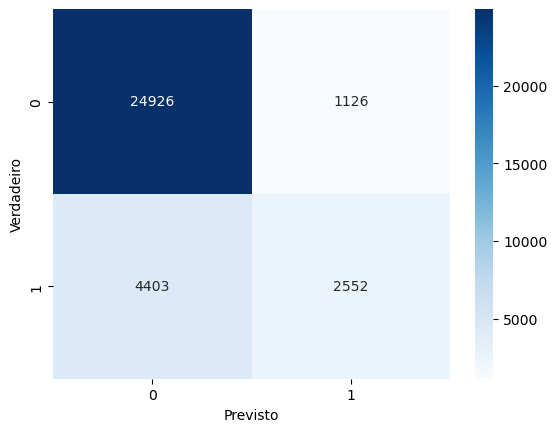

In [16]:
# Cálculo das métricas detalhadas
precision_0 = precision_score(y_test, y_pred, pos_label=0)
recall_0 = recall_score(y_test, y_pred, pos_label=0)
f1_0 = f1_score(y_test, y_pred, pos_label=0)
support_0 = cm[0, 0] + cm[0, 1]  # Total da classe 0

precision_1 = precision_score(y_test, y_pred, pos_label=1)
recall_1 = recall_score(y_test, y_pred, pos_label=1)
f1_1 = f1_score(y_test, y_pred, pos_label=1)
support_1 = cm[1, 0] + cm[1, 1]  # Total da classe 1

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.show()


Métricas para a Classe 0:
Precisão: 0.85
Recall: 0.96
F1-Score: 0.90
Support: 26052

Métricas para a Classe 1:
Precisão: 0.69
Recall: 0.37
F1-Score: 0.48
Support: 6955




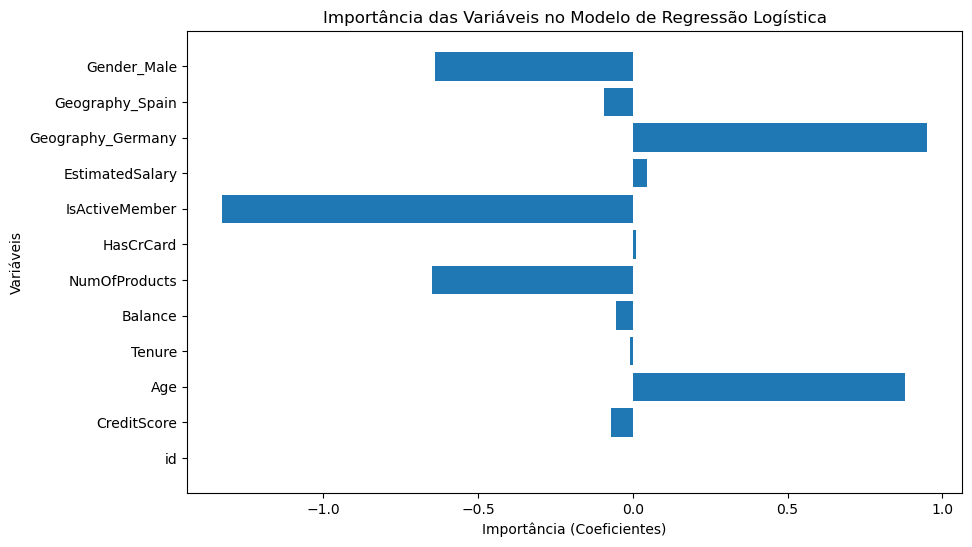

In [17]:
if hasattr(model, 'coef_'):

    print("\nMétricas para a Classe 0:")
    print(f"Precisão: {precision_0:.2f}")
    print(f"Recall: {recall_0:.2f}")
    print(f"F1-Score: {f1_0:.2f}")
    print(f"Support: {support_0}")
  
    print("\nMétricas para a Classe 1:")
    print(f"Precisão: {precision_1:.2f}")
    print(f"Recall: {recall_1:.2f}")
    print(f"F1-Score: {f1_1:.2f}")
    print(f"Support: {support_1}\n\n")
  
    # Para a Regressão Logística, usamos coef_ ao invés de feature_importances_
    importancia_features = model.coef_[0]  # Acesso aos coeficientes do modelo

    # Obter os nomes das colunas
    colunas_totais = X.columns.tolist()

    # Visualizar a importância
    plt.figure(figsize=(10, 6))
    plt.barh(colunas_totais, importancia_features)
    plt.xlabel('Importância (Coeficientes)')
    plt.ylabel('Variáveis')
    plt.title('Importância das Variáveis no Modelo de Regressão Logística')
    plt.show()
else:
    print("O modelo não possui o atributo 'coef_'.")



In [19]:
"""
# Da para rodar um cross validation para visualizar mas vai da erro no cod kk
from sklearn.ensemble import RandomForestClassifier 

model = RandomForestClassifier()

scores = cross_val_score(model, X_train, y_train, cv=5)  # cv é o número de folds

print(f'Scores de validação cruzada: {scores}')
print(f'Média das acurácias: {scores.mean():.2f}')
"""

"\n# Da para rodar um cross validation para visualizar mas vai da erro no cod kk\nfrom sklearn.ensemble import RandomForestClassifier \n\nmodel = RandomForestClassifier()\n\nscores = cross_val_score(model, X_train, y_train, cv=5)  # cv é o número de folds\n\nprint(f'Scores de validação cruzada: {scores}')\nprint(f'Média das acurácias: {scores.mean():.2f}')\n"